

##Phan loai cac bai bao dua tren chu de
###Capstone 2 - Automation Text Vietnamese Summarization


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/TS


In [1]:
!pip install pyvi


     |████████████████████████████████| 8.5MB 4.5MB/s 
     |████████████████████████████████| 747kB 43.9MB/s 


In [11]:
from pyvi import ViTokenizer
gg = ViTokenizer.tokenize("chúng tôi muốn tư vấn về các dịch vụ mới")
print(gg)
for i in gg.split(" "):
  print(i)

chúng_tôi muốn tư_vấn về các dịch_vụ mới
chúng_tôi
muốn
tư_vấn
về
các
dịch_vụ
mới


In [8]:
from pyvi import ViTokenizer, ViPosTagger # thư viện NLP tiếng Việt
from tqdm import tqdm
import numpy as np
import gensim # thư viện NLP
import argparse
import os 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing
from keras.models import model_from_json

model_path = '/content/drive/MyDrive/Capstone 2 - AVTS/Project/TextSummarization/model/'
data_path = '/content/drive/MyDrive/Capstone 2 - AVTS/Project/TextSummarization/data/'

def preprocess(doc):
    lines = gensim.utils.simple_preprocess(doc)
    lines = ' '.join(lines)
    lines = ViTokenizer.tokenize(lines)
    with open(data_path+'vietnamese-stopwords-dash.txt', 'r') as f:
        stopwords = set([w.strip() for w in f.readlines()])
    try:
        split_words =  [x.strip('0123456789%@$.,=+-!;/()*"&^:#|\n\t\'').lower() for x in lines.split()]
    except TypeError:
        split_words =  []
    lines = ' '.join([word for word in split_words if word not in stopwords])

    x = [lines]
    return x

text = '''
Nhược cơ (Myasthenia gravis) là bệnh rối loạn thần kinh tự miễn, mạn tính, đặc trưng là yếu và mỏi cơ. Rối loạn này thường biểu hiện rõ ràng ở tuổi trưởng thành, tuy nhiên, triệu chứng khởi phát có thể xảy ra tại mọi thời điểm trong đời của bệnh nhân.

Theo Tổ chức Quốc gia về Rối loạn Hiếm gặp Mỹ, thông thường, xung động từ thần kinh đến các cơ quan đảm bảo cho chúng hoạt động nhờ chất dẫn truyền thần kinh acetylcholin (Ach). Người bị nhược cơ có hiện tượng cơ thể tự sinh ra loại kháng thể kháng Ach, làm giảm số lượng chất này. Hậu quả là sự dẫn truyền các xung thần kinh từ những đầu mút tới màng hậu synap bị suy giảm hoặc thiếu khuyết. Kết quả là bệnh nhân bị yếu, liệt cơ.

Tình trạng này có thể chỉ giới hạn ở một số nhóm cơ, đặc biệt là mắt. Hoặc trong nhiều trường hợp, bệnh nhân bị yếu, liệt cơ toàn thân. Hầu hết người mắc đều gặp phải hiện tượng sụp mí (ptosis) dẫn đến hoa mắt, mệt mỏi.
'''
a = '''
'''
x = preprocess(text)

encoder = preprocessing.LabelEncoder()
encoder.classes_ = np.load(model_path+'classes.npy')

tfidf_vect = TfidfVectorizer(analyzer='word', max_features=30000)
tfidf_vect = pickle.load(open(model_path+"tfidf_vectorizer.pickle", "rb"))

tfidf_x = tfidf_vect.transform(x)

svd = TruncatedSVD(n_components=500, random_state=1998)

svd = pickle.load(open(model_path+"svd_selector.pickle", "rb"))
tfidf_x_svd = svd.transform(tfidf_x)

json_file = open(model_path+'model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights int|o new model
loaded_model.load_weights(model_path+"model.h5")
print("Loaded model from disk")
print("-----------------------------------------------------------------------------------------------")
print(encoder.inverse_transform([np.argmax(loaded_model.predict(np.array(tfidf_x_svd))[0])])[0])
print("-----------------------------------------------------------------------------------------------")


Loaded model from disk
-----------------------------------------------------------------------------------------------
Suc khoe
-----------------------------------------------------------------------------------------------


In [ ]:
from sklearn import metrics

In [ ]:
import os 

def get_data(folder_path):
    data = []
    labels = []
    dirs = os.listdir(folder_path)
    for path in tqdm(dirs):
        file_paths = os.listdir(os.path.join(folder_path, path))
        for file_path in (file_paths):
            with open(os.path.join(folder_path, path, file_path), 'r', encoding="utf-16") as f:
                lines = f.readlines()
                lines = ' '.join(lines)
                
                # Tien xu li du lieu don gian
                lines = gensim.utils.simple_preprocess(lines)
                lines = ' '.join(lines)
        
                lines = ViTokenizer.tokenize(lines)
                data.append(lines)
                labels.append(path)

    return data, labels


In [ ]:
!unrar x -r /content/drive/MyDrive/TS/data/Train_Full.rar

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Extracting  Train_Full/Kinh doanh/KD_ VNE_ (376).txt                      83%  OK 
Extracting  Train_Full/Kinh doanh/KD_ VNE_ (55).txt                       83%  OK 
Extracting  Train_Full/Kinh doanh/KD_ VNE_ (75).txt                       83%  OK 
Extracting  Train_Full/Kinh doanh/KD_ VNE_ (77).txt                       83%  OK 
Extracting  Train_Full/Kinh doanh/KD_ VNE_ (85).txt                       83%  OK 
Extracting  Train_Full/Kinh doanh/KD_ VNE_ (89).txt                       83%  OK 
Extracting  Train_Full/Kinh doanh/KD_ VNE_ (90).txt                       83%  OK 
Extracting  Train_Full/Kinh doanh/KD_ VNE_ (91).txt                       83%  OK 
Extracting  Train_Full/Kinh doanh/KD_ VNE_ (96).txt                       83%  OK 
Extracting  Train_Full/Kinh doanh/KD_ VNE_ (103).txt                      83%  OK 
Extracting  Train_Full/

In [ ]:
!unrar x -r /content/drive/MyDrive/TS/data/Test_Full.rar

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6148).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6210).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6079).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6083).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6086).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6088).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6312).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6092).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6094).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6101).txt                        89%  OK 
Extracting  Test_Full/V

In [ ]:
X_data, y_data = get_data('/content/drive/MyDrive/TS/data/Train_Full')

100%|██████████| 10/10 [07:43<00:00, 46.38s/it]


In [ ]:
import pickle

pickle.dump(X_data, open('/content/drive/MyDrive/TS/data/X_data.pkl', 'wb'))
pickle.dump(y_data, open('/content/drive/MyDrive/TS/data/y_data.pkl', 'wb'))


In [ ]:
X_test, y_test = get_data('/content/drive/MyDrive/TS/data/Test_Full')

100%|██████████| 10/10 [11:51<00:00, 71.17s/it]


In [ ]:
pickle.dump(X_test, open('/content/drive/MyDrive/TS/data/X_test.pkl', 'wb'))
pickle.dump(y_test, open('/content/drive/MyDrive/TS/data/y_test.pkl', 'wb'))

In [ ]:
import os
import pickle
X_test = pickle.load(open("/content/drive/MyDrive/TS/data/X_data.pkl",'rb'))
y_test = pickle.load(open("/content/drive/MyDrive/TS/data/y_data.pkl",'rb'))
X_data = pickle.load(open("/content/drive/MyDrive/TS/data/X_test.pkl",'rb'))
y_data = pickle.load(open("/content/drive/MyDrive/TS/data/y_test.pkl",'rb'))

In [ ]:
with open('/content/drive/MyDrive/TS/data/vietnamese-stopwords-dash.txt', 'r') as f:
    stopwords = set([w.strip() for w in f.readlines()])

In [ ]:
for i in range(len(X_data)):
    text = X_data[i]
    try:
        split_words =  [x.strip('0123456789%@$.,=+-!;/()*"&^:#|\n\t\'').lower() for x in text.split()]
    except TypeError:
        split_words =  []
    X_data[i] = ' '.join([word for word in split_words if word not in stopwords])

In [ ]:
for i in range(len(X_test)):
    text = X_test[i]
    try:
        split_words =  [x.strip('0123456789%@$.,=+-!;/()*"&^:#|\n\t\'').lower() for x in text.split()]
    except TypeError:
        split_words =  []
    X_test[i] = ' '.join([word for word in split_words if word not in stopwords])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer='word', max_features=10000)
tfidf_vect.fit(X_data)

In [ ]:
pickle.dump(tfidf_vect, open("/content/drive/MyDrive/TS/model/tdidf_vectorizer.pickle", "wb"))

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=500, random_state=42)
svd.fit(tfidf_X_data)

In [ ]:
pickle.dump(svd, open("/content/drive/MyDrive/TS/model/svd_selector.pickle", "wb"))

In [ ]:
tfidf_vectorizer = pickle.load(open('/content/drive/MyDrive/TS/model/tfidf_vectorizer.pickle', 'rb'))
svd_selector = pickle.load(open("/content/drive/MyDrive/TS/model/svd_selector.pickle",'rb'))
tfidf_X_data =  tfidf_vectorizer.transform(X_data)
tfidf_X_test =  tfidf_vectorizer.transform(X_test)
tfidf_X_data_svd = svd_selector.transform(tfidf_X_data)
tfidf_X_test_svd = svd_selector.transform(tfidf_X_test)


In [ ]:
from keras import models
from keras.models import *
from keras.layers import *
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from sklearn.model_selection import train_test_split

In [ ]:
def lstm_model():
    
    input_layer = Input(shape=(500,))
    layer = Reshape((1, 500))(input_layer)
    layer = LSTM(256, activation='relu',dropout=0.4,recurrent_dropout=0.3)(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(256, activation='relu')(layer)
    layer = Dense(256, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)
    output_layer = Dense(10, activation='softmax')(layer)
    model = models.Model(input_layer, output_layer)
    model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
def lstm_model2():
    
    input_layer = Input(shape=(500,))
    layer = Reshape((1, 500))(input_layer)
    layer = LSTM(256, activation='relu',dropout=0.4,recurrent_dropout=0.2)(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(256, activation='relu')(layer)
    layer = Dense(256, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)
    output_layer = Dense(10, activation='softmax')(layer)
    model = models.Model(input_layer, output_layer)
    model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
model = lstm_model()
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
reshape (Reshape)            (None, 1, 500)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               775168    
_________________________________________________________________
dense (Dense)                (None, 512)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

In [ ]:
model2 = lstm_model2()
model2.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
reshape (Reshape)            (None, 1, 500)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               775168    
_________________________________________________________________
dense (Dense)                (None, 512)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

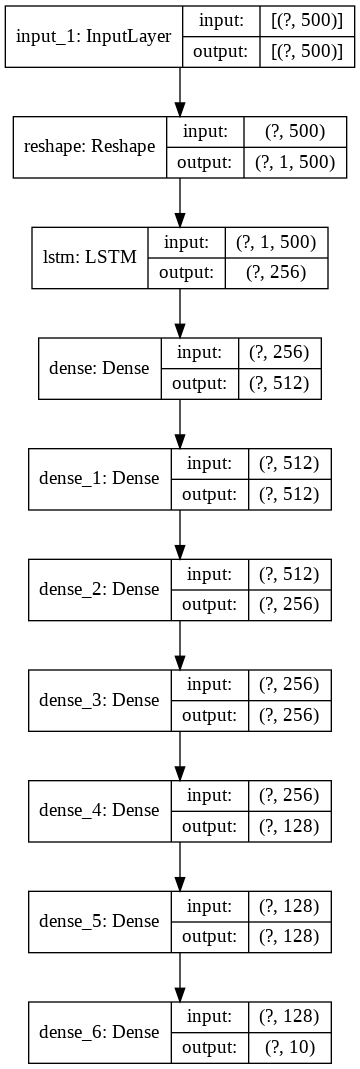

In [ ]:
from keras.utils import plot_model
plot_model(model2, to_file='model.png', show_shapes=True,show_layer_names=True)

In [ ]:
from sklearn import preprocessing
import numpy
encoder = preprocessing.LabelEncoder()
y_data_ohe = encoder.fit_transform(y_data)
y_test_ohe = encoder.fit_transform(y_test)
numpy.save('/content/drive/MyDrive/TS/model/classes.npy', encoder.classes_)

In [ ]:
y_data_ohe

array([3, 3, 3, ..., 8, 8, 8])

In [ ]:
y_test_ohe

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# encoder.classes_ = numpy.load('/content/drive/MyDrive/TS/model/classes.npy')

In [ ]:

from sklearn import metrics

def train(model, X_data, y_data, X_test, y_test, n_epochs=50):   
    #split training data and validation data
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.05, random_state=42)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=512)
    
    train_predictions = model.predict(X_train)
    val_predictions = model.predict(X_val)
    test_predictions = model.predict(X_test)
    
    val_predictions = val_predictions.argmax(axis=-1)
    test_predictions = test_predictions.argmax(axis=-1)
    train_predictions = train_predictions.argmax(axis=-1)

    print("Train accuracy", metrics.accuracy_score(train_predictions, y_train))
    print("Validation accuracy: ", metrics.accuracy_score(val_predictions, y_val))
    print("Test accuracy: ", metrics.accuracy_score(test_predictions, y_test))
    
    model_json = model.to_json()
    with open("/content/drive/MyDrive/TS/model/model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("/content/drive/MyDrive/TS/model/model.h5")
    print("Saved model to disk")
    
    return history

In [ ]:
history = train(model=model, X_data= tfidf_X_data_svd, y_data=y_data_ohe, X_test=tfidf_X_test_svd, y_test=y_test_ohe)

Epoch 1/50
94/94 [==============================] - 11s 116ms/step - loss: 1.6406 - accuracy: 0.4144 - val_loss: 0.6348 - val_accuracy: 0.8114
Epoch 2/50
94/94 [==============================] - 10s 107ms/step - loss: 0.6901 - accuracy: 0.7771 - val_loss: 0.3993 - val_accuracy: 0.8781
Epoch 3/50
94/94 [==============================] - 10s 106ms/step - loss: 0.4848 - accuracy: 0.8498 - val_loss: 0.3281 - val_accuracy: 0.9055
Epoch 4/50
94/94 [==============================] - 10s 106ms/step - loss: 0.4040 - accuracy: 0.8765 - val_loss: 0.3205 - val_accuracy: 0.9051
Epoch 5/50
94/94 [==============================] - 10s 107ms/step - loss: 0.3467 - accuracy: 0.8938 - val_loss: 0.2796 - val_accuracy: 0.9143
Epoch 6/50
94/94 [==============================] - 10s 107ms/step - loss: 0.3100 - accuracy: 0.9049 - val_loss: 0.2686 - val_accuracy: 0.9131
Epoch 7/50
94/94 [==============================] - 10s 111ms/step - loss: 0.2800 - accuracy: 0.9124 - val_loss: 0.2739 - val_accuracy: 0.9051

In [ ]:
history = train(model=model2, X_data= tfidf_X_data_svd, y_data=y_data_ohe, X_test=tfidf_X_test_svd, y_test=y_test_ohe)


Epoch 1/50
94/94 [==============================] - 10s 111ms/step - loss: 1.6767 - accuracy: 0.3782 - val_loss: 0.6701 - val_accuracy: 0.8225
Epoch 2/50
94/94 [==============================] - 10s 108ms/step - loss: 0.7589 - accuracy: 0.7544 - val_loss: 0.3798 - val_accuracy: 0.8785
Epoch 3/50
94/94 [==============================] - 10s 107ms/step - loss: 0.5172 - accuracy: 0.8386 - val_loss: 0.3237 - val_accuracy: 0.8984
Epoch 4/50
94/94 [==============================] - 11s 113ms/step - loss: 0.4357 - accuracy: 0.8638 - val_loss: 0.2939 - val_accuracy: 0.9083
Epoch 5/50
94/94 [==============================] - 10s 107ms/step - loss: 0.3818 - accuracy: 0.8813 - val_loss: 0.2884 - val_accuracy: 0.9143
Epoch 6/50
94/94 [==============================] - 10s 108ms/step - loss: 0.3490 - accuracy: 0.8912 - val_loss: 0.2698 - val_accuracy: 0.9139
Epoch 7/50
94/94 [==============================] - 10s 108ms/step - loss: 0.3256 - accuracy: 0.8979 - val_loss: 0.2749 - val_accuracy: 0.9170

In [ ]:
import matplotlib.pyplot as plt

def visualize(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val_acc'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

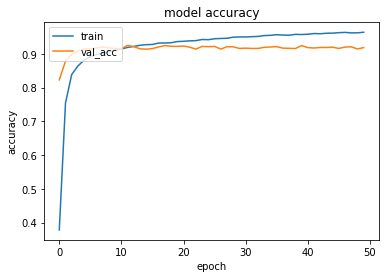

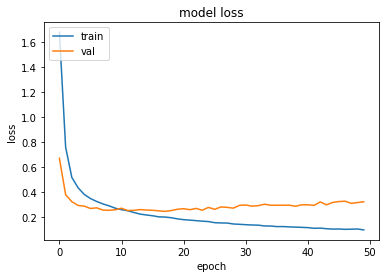

In [ ]:
visualize(history)

In [ ]:
predict1 = model.predict(np.array([tfidf_X_test_svd[1]]))

In [ ]:
numpy.argmax(predict1[0])


0

In [ ]:
y_test_ohe[0]

0

In [ ]:
np.array([tfidf_X_test_svd[1]]).shape

(1, 500)

In [ ]:
tfidf_X_test_svd.shape

(33759, 500)

Another model


In [ ]:
history = train(model=model2, X_data= tfidf_X_data_svd, y_data=y_data_ohe, X_test=tfidf_X_test_svd, y_test=y_test_ohe)

In [ ]:

# Train Model
def train_model_classifier(classifier, x_data, y_data, x_test, y_test, n_epochs=100):
    x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=42)
    classifier.fit(x_train, y_train)
    train_predictions = classifier.predict(x_train)
    val_predictions = classifier.predict(x_val)
    test_predictions = classifier.predict(x_test)
    #pickle.dump(classifier, open('/content/drive/MyDrive/TS/model/linearmodel', 'wb'))
    # Evaluation
    print("> Validation Accuracy: ", metrics.accuracy_score(val_predictions, y_val))
    print("> Test Accuracy: ", metrics.accuracy_score(test_predictions, y_test))
    print("> Validation Precision: ", metrics.precision_score(y_val, val_predictions, average='macro'))
    print("> Test Precision: ", metrics.precision_score(y_test, test_predictions, average='macro'))
    print("> Validation Recall: ", metrics.recall_score(y_val, val_predictions, average='macro'))
    print("> Test Recall: ", metrics.recall_score(y_test, test_predictions, average='macro'))
    print("> Validation F1 Score: ", metrics.f1_score(y_val, val_predictions, average='macro'))
    print("> Test F1 Score: ", metrics.f1_score(y_test, test_predictions, average='macro'))


In [ ]:
# Logistic Regression
from sklearn import linear_model
import time 

print("\n\n----- Logistic Regression -----")
lr_start = time.time()
train_model_classifier(linear_model.LogisticRegression(), tfidf_X_data_svd, y_data, tfidf_X_test_svd, y_test)
lr_end = time.time()
print(f"Training time: {lr_end - lr_start}s")




----- Logistic Regression -----


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


> Validation Accuracy:  0.9126637554585153
> Test Accuracy:  0.891229005598507
> Validation Precision:  0.9015018287208412
> Test Precision:  0.8869230295679973
> Validation Recall:  0.8875290749322604
> Test Recall:  0.885739417966299
> Validation F1 Score:  0.8937472313669682
> Test F1 Score:  0.8854903345321441
Training time: 17.94512939453125s


In [ ]:
# Logistic Regression with tfidf not svd
from sklearn import linear_model
import time 

print("\n\n----- Logistic Regression -----")
lr_start = time.time()
train_model_classifier(linear_model.LogisticRegression(), tfidf_X_data, y_data, tfidf_X_test, y_test)
lr_end = time.time()
print(f"Training time: {lr_end - lr_start}s")




----- Logistic Regression -----


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


> Validation Accuracy:  0.9229853116315998
> Test Accuracy:  0.9079060398708493
> Validation Precision:  0.9136629004537905
> Test Precision:  0.90515820097119
> Validation Recall:  0.8992183307155536
> Test Recall:  0.9038099643880839
> Validation F1 Score:  0.9056327864845283
> Test F1 Score:  0.9039631406969523
Training time: 36.443899631500244s


In [ ]:
# Random Forest Classifier
from sklearn import ensemble

print("\n\n----- Random Forest Classifier -----")
rfc_start = time.time()
train_model_classifier(ensemble.RandomForestClassifier(), tfidf_X_data_svd, y_data, tfidf_X_test_svd, y_test)
rfc_end = time.time()
print(f"> Training time: {rfc_stop - rfc_end}s")



----- Random Forest Classifier -----
> Validation Accuracy:  0.888646288209607
> Test Accuracy:  0.8530465949820788
> Validation Precision:  0.8886547204255233
> Test Precision:  0.8577270361463502
> Validation Recall:  0.8485513412229277
> Test Recall:  0.8398210091893962
> Validation F1 Score:  0.862766576355473
> Test F1 Score:  0.8429104950576415
> Training time: 186.76045036315918s


In [ ]:
# Random Forest Classifier
from sklearn import ensemble
#random forest with tfidf non svd
print("\n\n----- Random Forest Classifier -----")
rfc_start = time.time()
train_model_classifier(ensemble.RandomForestClassifier(), tfidf_X_data, y_data, tfidf_X_test, y_test)
rfc_end = time.time()
print(f"> Training time: {rfc_end - rfc_start}s")



----- Random Forest Classifier -----
> Validation Accuracy:  0.868598650258039
> Test Accuracy:  0.8203145827779259
> Validation Precision:  0.8818199542740572
> Test Precision:  0.8369944544464613
> Validation Recall:  0.8129489632841314
> Test Recall:  0.7996022319428778
> Validation F1 Score:  0.830002473234828
> Test F1 Score:  0.7986118867023648
> Training time: 332.0451226234436s


In [ ]:
# Naive Bayes (Multinomial)
from sklearn import naive_bayes

print("\n\n----- Naive Bayes (Multinomial) -----")
nbm_start = time.time()
train_model_classifier(naive_bayes.MultinomialNB(), tfidf_X_data, y_data, tfidf_X_test, y_test)
nbm_end = time.time()
print(f"> Training time: {nbm_end - nbm_start}s")



----- Naive Bayes (Multinomial) -----
> Validation Accuracy:  0.8828900357284637
> Test Accuracy:  0.8258538463817057
> Validation Precision:  0.8832522180073104
> Test Precision:  0.8339171626860418
> Validation Recall:  0.8359084490231637
> Test Recall:  0.8101342210070891
> Validation F1 Score:  0.8499089009739377
> Test F1 Score:  0.8047293761775318
> Training time: 0.8591327667236328s
